In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from arch.data import crude
from arch.unitroot import ADF, engle_granger
from arch.unitroot.cointegration import phillips_ouliaris

plt.style.use('bmh')

In [2]:
log_price = np.log(crude.load())
log_price

,Brent,WTI
Date,,
1987-05-15,2.922086,2.967333
1987-06-15,2.937043,2.999226
1987-07-15,2.988708,3.060583
1987-08-15,2.943386,3.011113
1987-09-15,2.907447,2.971952
...,...,...
2019-09-15,4.140433,4.042174
2019-10-15,4.089500,3.988243
2019-11-15,4.146463,4.043577


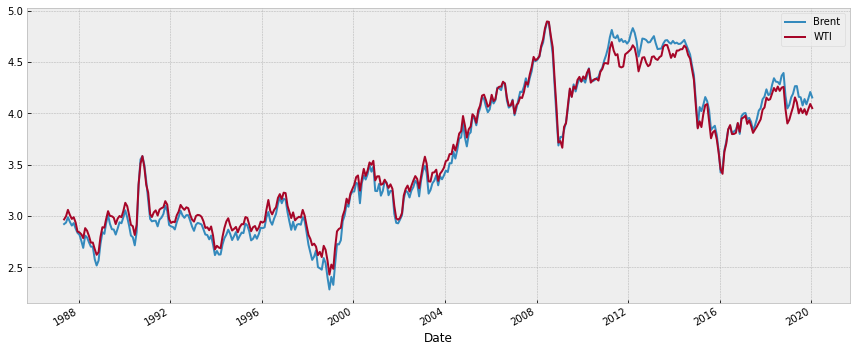

In [3]:
log_price.plot(figsize=(12,5))
plt.tight_layout()
plt.show()

In [4]:
# both have unit root

print("***** WTI *****")
adf = ADF(log_price.WTI)
print(adf.summary())
print('-'*50)
print('\n')
print("***** Brent *****")
adf = ADF(log_price.Brent)
print(adf.summary())

***** WTI *****
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.780
P-value                         0.391
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
--------------------------------------------------


***** Brent *****
   Augmented Dickey-Fuller Results   
Test Statistic                 -1.655
P-value                         0.454
Lags                                1
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


## Engle-Granger

In [5]:
eg = engle_granger(log_price.WTI, log_price.Brent, trend='n')
print(eg.summary())

     Engle-Granger Cointegration Test    
Test Statistic                     -3.468
P-value                             0.007
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.939
-----------------------------------------

Trend: Constant
Critical Values: -2.47 (10%), -2.78 (5%), -3.37 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1


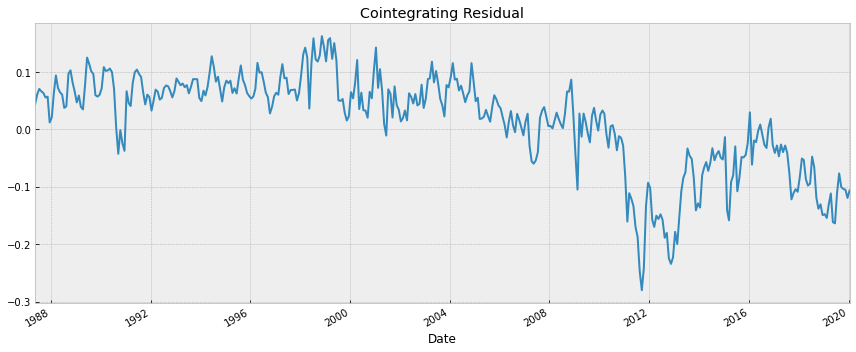

In [6]:
fig = eg.plot()
fig.set_size_inches(12,5)
plt.tight_layout()

In [7]:
eg.cointegrating_vector

WTI      1.000000
Brent   -1.000621
dtype: float64

In [8]:
eg = engle_granger(log_price.WTI, log_price.Brent, trend='ct')
print(eg.summary())

     Engle-Granger Cointegration Test    
Test Statistic                     -5.837
P-value                             0.000
ADF Lag length                          0
Estimated Root ρ (γ+1)              0.840
-----------------------------------------

Trend: Constant
Critical Values: -3.52 (10%), -3.81 (5%), -4.37 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 1


In [9]:
eg.cointegrating_vector

WTI      1.000000
Brent   -0.931769
const   -0.296939
trend    0.000185
dtype: float64

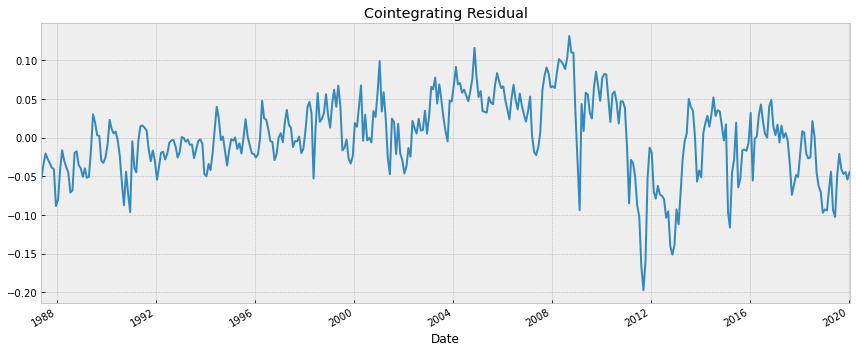

In [10]:
fig = eg.plot()
fig.set_size_inches(12,5)
plt.tight_layout()

## Phillips-Ouliaris

In [11]:
po_zt = phillips_ouliaris(log_price.WTI, log_price.Brent, test_type='Zt')
print(po_zt.summary())

Phillips-Ouliaris Zt Cointegration Test
Test Statistic                 -5.357
P-value                         0.000
Kernel                       Bartlett
Bandwidth                      10.185
-------------------------------------

Trend: Constant
Critical Values: -3.06 (10%), -3.36 (5%), -3.93 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 3


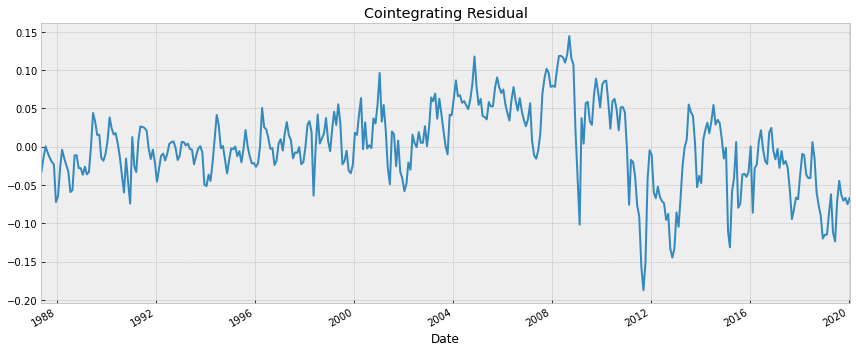

In [12]:
fig = po_zt.plot()
fig.set_size_inches(12,5)
plt.tight_layout()

In [13]:
po_za = phillips_ouliaris(log_price.WTI, log_price.Brent, test_type='Za')
print(po_za.summary())

Phillips-Ouliaris Za Cointegration Test
Test Statistic                -53.531
P-value                         0.000
Kernel                       Bartlett
Bandwidth                      10.185
-------------------------------------

Trend: Constant
Critical Values: -16.95 (10%), -20.34 (5%), -27.76 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 3


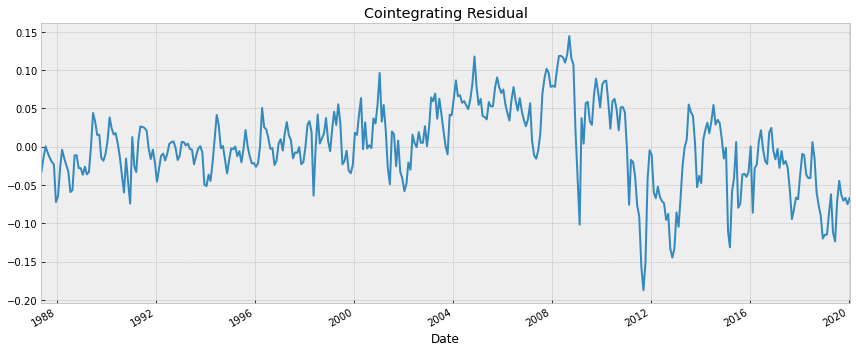

In [14]:
fig = po_za.plot()
fig.set_size_inches(12,5)
plt.tight_layout()

In [15]:
po_pu = phillips_ouliaris(log_price.WTI, log_price.Brent, test_type='Pu')
print(po_pu.summary())

Phillips-Ouliaris Pu Cointegration Test
Test Statistic                102.868
P-value                         0.000
Kernel                       Bartlett
Bandwidth                      14.648
-------------------------------------

Trend: Constant
Critical Values: 27.01 (10%), 32.93 (5%), 46.01 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 2


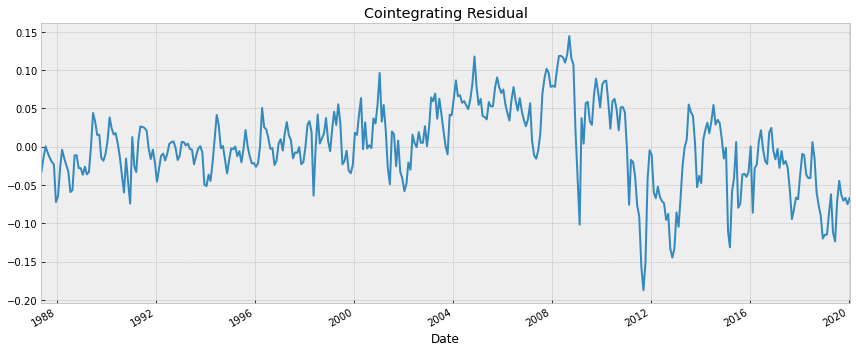

In [16]:
fig = po_pu.plot()
fig.set_size_inches(12,5)
plt.tight_layout()

In [17]:
po_pz = phillips_ouliaris(log_price.WTI, log_price.Brent, test_type='Pz')
print(po_pz.summary())

Phillips-Ouliaris Pz Cointegration Test
Test Statistic                114.601
P-value                         0.000
Kernel                       Bartlett
Bandwidth                      14.648
-------------------------------------

Trend: Constant
Critical Values: 45.39 (10%), 52.41 (5%), 67.39 (1%)
Null Hypothesis: No Cointegration
Alternative Hypothesis: Cointegration
Distribution Order: 2


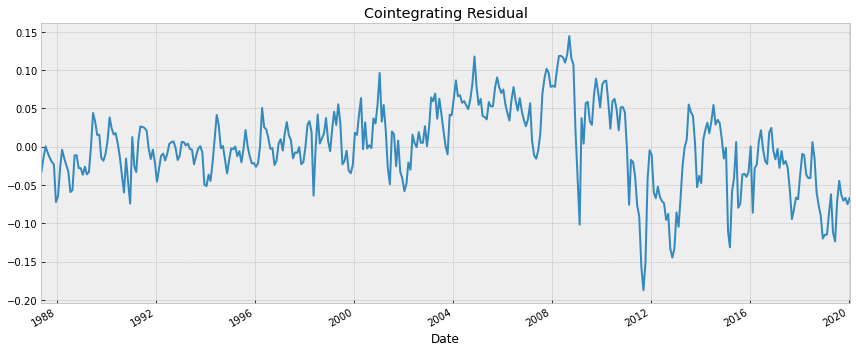

In [18]:
fig = po_pz.plot()
fig.set_size_inches(12,5)
plt.tight_layout()